# Dataset overview
## This datasset conatins detailed record of coffee sales from a vending machine.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import joblib

# 1 Data inspection

In [3]:
df=pd.read_excel("C:/Users/user/Desktop/coffee sales.xlsx")
df

,date,datetime,cash_type,card,money,coffee_name
0,45352,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,45352,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,45352,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,45352,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,45352,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,45504,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,45504,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,45504,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,45504,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


In [5]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,45352,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,45352,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,45352,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,45352,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,45352,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   int64         
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 53.2+ KB


In [7]:
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

In [8]:
df.describe()

,date,datetime,money
count,1133.000000,1133,1133.000000
mean,45431.483672,2024-05-20 02:38:39.053382912,33.105808
min,45352.000000,2024-03-01 10:15:50.520000,18.120000
25%,45396.000000,2024-04-14 10:55:27.406000128,28.900000
50%,45435.000000,2024-05-23 12:22:06.604999936,32.820000
75%,45465.000000,2024-06-22 08:39:50.272999936,37.720000
max,45504.000000,2024-07-31 21:55:16.570000,40.000000
std,44.514092,NaN,5.035366


In [9]:


df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   int64         
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 53.2+ KB


In [11]:
df['coffee_name'].unique()

array(['Latte', 'Hot Chocolate', 'Americano', 'Americano with Milk',
       'Cocoa', 'Cortado', 'Espresso', 'Cappuccino'], dtype=object)

In [12]:
df['cash_type'].unique()

array(['card', 'cash'], dtype=object)

In [13]:
df['datetime'] = pd.to_datetime(df['datetime'])



In [14]:
df

,date,datetime,cash_type,card,money,coffee_name
0,45352,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,45352,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,45352,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,45352,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,45352,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,45504,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,45504,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,45504,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,45504,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


In [15]:
df['datetime'] = pd.to_datetime(df['datetime'])
df

,date,datetime,cash_type,card,money,coffee_name
0,45352,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,45352,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,45352,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,45352,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,45352,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,45504,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,45504,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,45504,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,45504,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


In [37]:
print(df.isnull().sum())

date           0
datetime       0
cash_type      0
card           0
money          0
hour           0
day_of_week    0
month          0
coffee_name    0
dtype: int64


In [17]:
df['card'] = df['card'].fillna('CASH')
df.isnull().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

In [18]:
# Total revenue
total_revenue = df['money'].sum()

# Top 5 coffee types
top_coffee = df['coffee_name'].value_counts().head(5)

# Payment type split
payment_split = df['cash_type'].value_counts()

# Revenue by coffee
revenue_per_coffee = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)


In [19]:
# Make sure datetime is in correct format
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract hour, day of week, month
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()
df['month'] = df['datetime'].dt.month_name()

# Now you can group by hour
hourly_sales = df.groupby('hour')['money'].sum()

# And group by day of week
daily_sales = df.groupby('day_of_week')['money'].sum().sort_values(ascending=False)

print(hourly_sales)
print(daily_sales)

hour
7      392.80
8     1380.38
9     1515.48
10    4553.18
11    3258.64
12    2850.60
13    2511.60
14    2484.92
15    2158.76
16    2525.36
17    2639.08
18    2558.04
19    3388.32
20    1819.92
21    2343.86
22    1127.94
Name: money, dtype: float64
day_of_week
Tuesday      6092.48
Thursday     5466.74
Friday       5386.32
Wednesday    5327.20
Saturday     5216.26
Sunday       5050.20
Monday       4969.68
Name: money, dtype: float64


In [20]:
print("Total Revenue:", total_revenue)
print("\nTop Coffees:\n", top_coffee)
print("\nPayment Split:\n", payment_split)
print("\nRevenue by Coffee:\n", revenue_per_coffee)
print("\nHourly Sales:\n", hourly_sales)
print("\nDaily Sales:\n", daily_sales)



Total Revenue: 37508.880000000005

Top Coffees:
 coffee_name
Americano with Milk    268
Latte                  243
Cappuccino             196
Americano              169
Cortado                 99
Name: count, dtype: int64

Payment Split:
 cash_type
card    1044
cash      89
Name: count, dtype: int64

Revenue by Coffee:
 coffee_name
Latte                  9009.14
Americano with Milk    8601.94
Cappuccino             7333.14
Americano              4644.54
Hot Chocolate          2778.48
Cortado                2745.08
Cocoa                  1295.94
Espresso               1100.62
Name: money, dtype: float64

Hourly Sales:
 hour
7      392.80
8     1380.38
9     1515.48
10    4553.18
11    3258.64
12    2850.60
13    2511.60
14    2484.92
15    2158.76
16    2525.36
17    2639.08
18    2558.04
19    3388.32
20    1819.92
21    2343.86
22    1127.94
Name: money, dtype: float64

Daily Sales:
 day_of_week
Tuesday      6092.48
Thursday     5466.74
Friday       5386.32
Wednesday    5327.20
Saturd

In [21]:
# Make sure datetime is in correct format
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract hour, day of week, month
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()
df['month'] = df['datetime'].dt.month_name()

# Now you can group by hour
hourly_sales = df.groupby('hour')['money'].sum()

# And group by day of week
daily_sales = df.groupby('day_of_week')['money'].sum().sort_values(ascending=False)

print(hourly_sales)
print(daily_sales)


hour
7      392.80
8     1380.38
9     1515.48
10    4553.18
11    3258.64
12    2850.60
13    2511.60
14    2484.92
15    2158.76
16    2525.36
17    2639.08
18    2558.04
19    3388.32
20    1819.92
21    2343.86
22    1127.94
Name: money, dtype: float64
day_of_week
Tuesday      6092.48
Thursday     5466.74
Friday       5386.32
Wednesday    5327.20
Saturday     5216.26
Sunday       5050.20
Monday       4969.68
Name: money, dtype: float64


# 2. Understanding through visualization

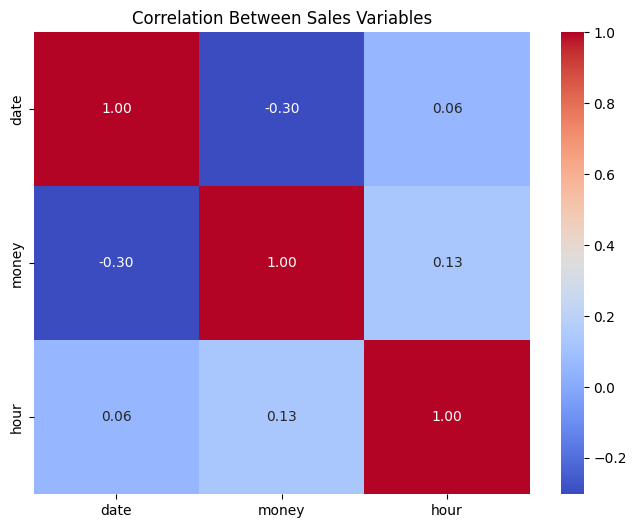

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['date','money','hour']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Sales Variables")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_3768\1272874341.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_coffee.values, y=top_coffee.index, palette="viridis")


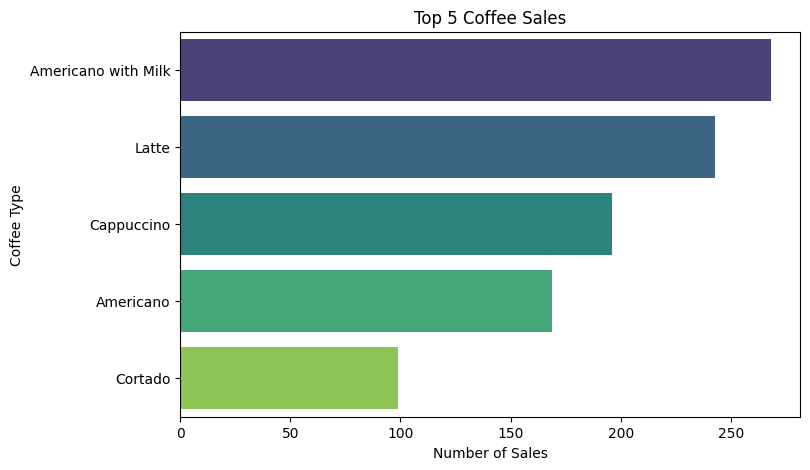

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_coffee.values, y=top_coffee.index, palette="viridis")
plt.title("Top 5 Coffee Sales")
plt.xlabel("Number of Sales")
plt.ylabel("Coffee Type")
plt.show()

# The most famous coffee is Americano with milk and the least famous is cotado.after the americano with milk latte is the most famous one.

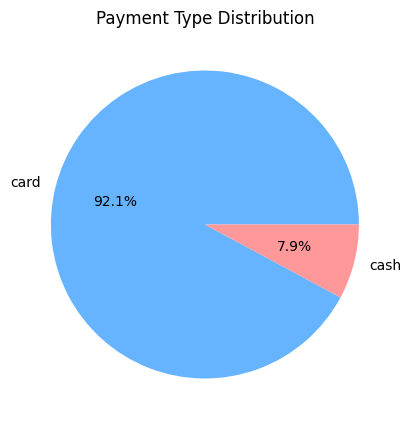

In [23]:
plt.figure(figsize=(5,5))
plt.pie(payment_split.values, labels=payment_split.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title("Payment Type Distribution")
plt.show()

## This pie chart clearly shows that majority of people use card to pay for for their coffee and nealry 8percent of people use cash.

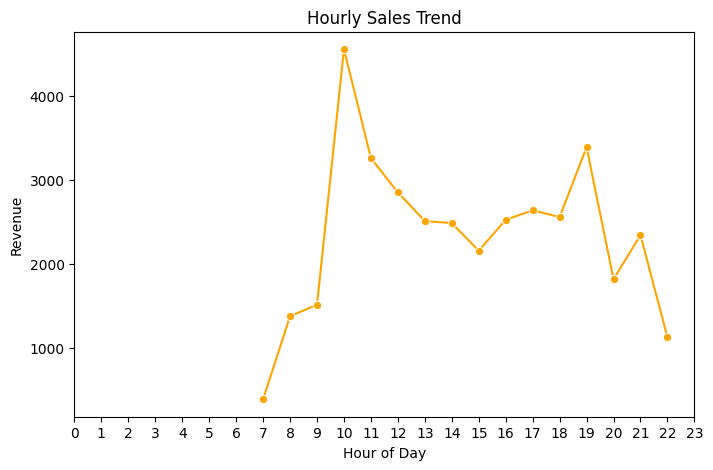

In [24]:
plt.figure(figsize=(8,5))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values, marker="o", color="orange")
plt.title("Hourly Sales Trend")
plt.xlabel("Hour of Day")
plt.ylabel("Revenue")
plt.xticks(range(0, 24))
plt.show()

# This graph shows the sales of coffee based on time and there is sudden soike between 9-10 indicating lot of peole are consuming cooffee at that time and people consume less coffee at 7 and night times .

C:\Users\user\AppData\Local\Temp\ipykernel_3768\1932045419.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_sales.index, y=daily_sales.values, palette="magma")


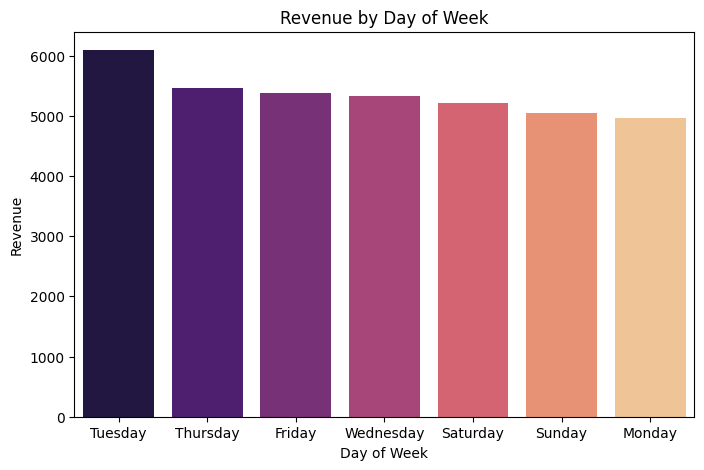

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(x=daily_sales.index, y=daily_sales.values, palette="magma")
plt.title("Revenue by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Revenue")
plt.show()

# This plot shows the sales of coffee on daily bases ,we can conclude that on average all days get almost equal amount of sales and particulary on tuesday the sales are slightly higher and low on monday/ Overall ,the sales are almost on all days.

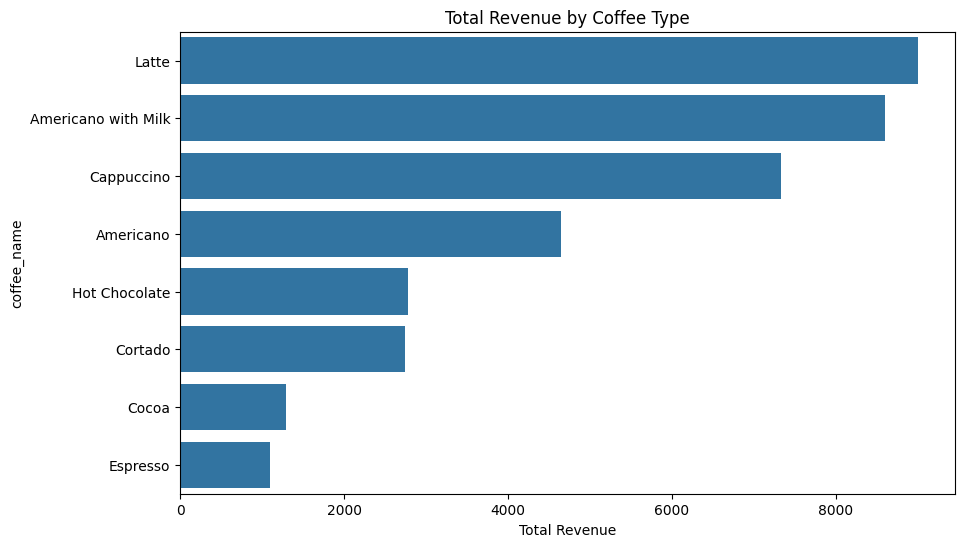

In [4]:
plt.figure(figsize=(10,6))
revenue_by_coffee = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='money', y='coffee_name', data=revenue_by_coffee)
plt.title("Total Revenue by Coffee Type")
plt.xlabel("Total Revenue")
plt.show()

# Wecan see that majority of the sales is through the latte coffee ,from previous we seen that americamo with milk has most sales bur the most profit making is latte and leastf profit making is expresso

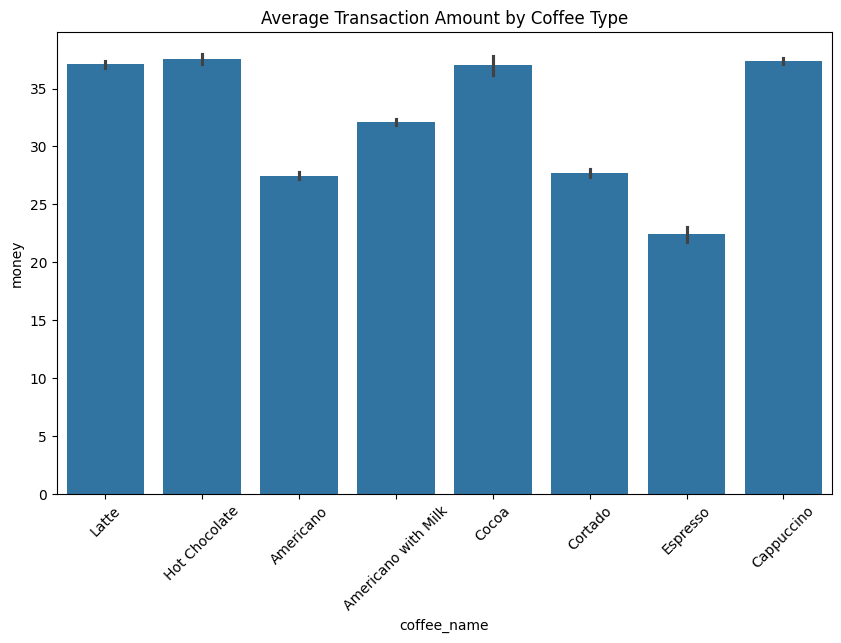

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x='coffee_name', y='money', data=df, estimator='mean')
plt.title("Average Transaction Amount by Coffee Type")
plt.xticks(rotation=45)
plt.show()

# Latte, Hot Chocolate, Cocoa, and Cappuccino have higher averages, while Espresso has the lowest.

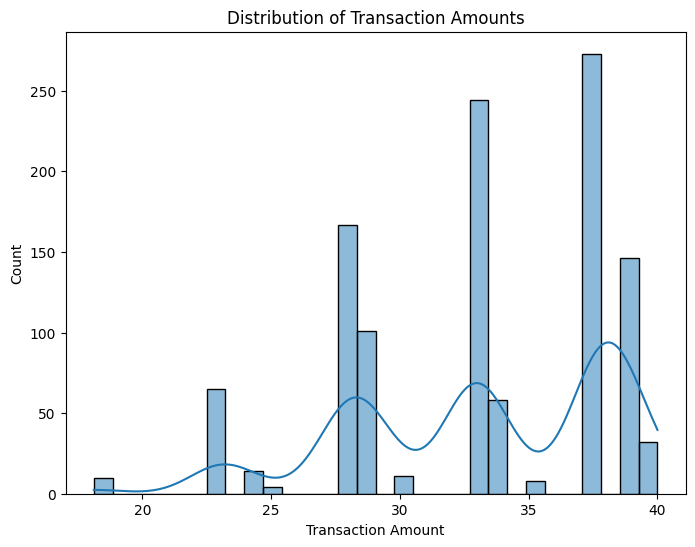

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(df['money'], bins=30, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.show()

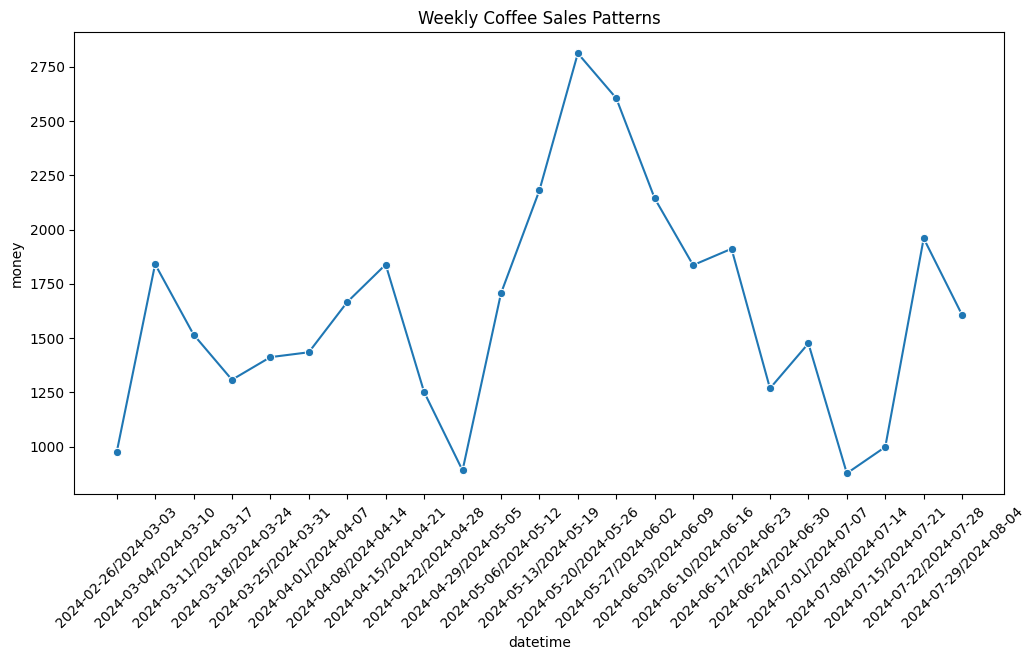

In [14]:
plt.figure(figsize=(12,6))
weekly_sales = df.groupby(df['datetime'].dt.to_period("W"))['money'].sum().reset_index()
weekly_sales['datetime'] = weekly_sales['datetime'].astype(str)
sns.lineplot(x='datetime', y='money', data=weekly_sales, marker="o")
plt.title("Weekly Coffee Sales Patterns")
plt.xticks(rotation=45)
plt.show()

# we can see that in may month we have high sales in that particular month.The least sales are in february month.This shows tgat in may season the high sales are very high,and in remaining seasons the sales are average.

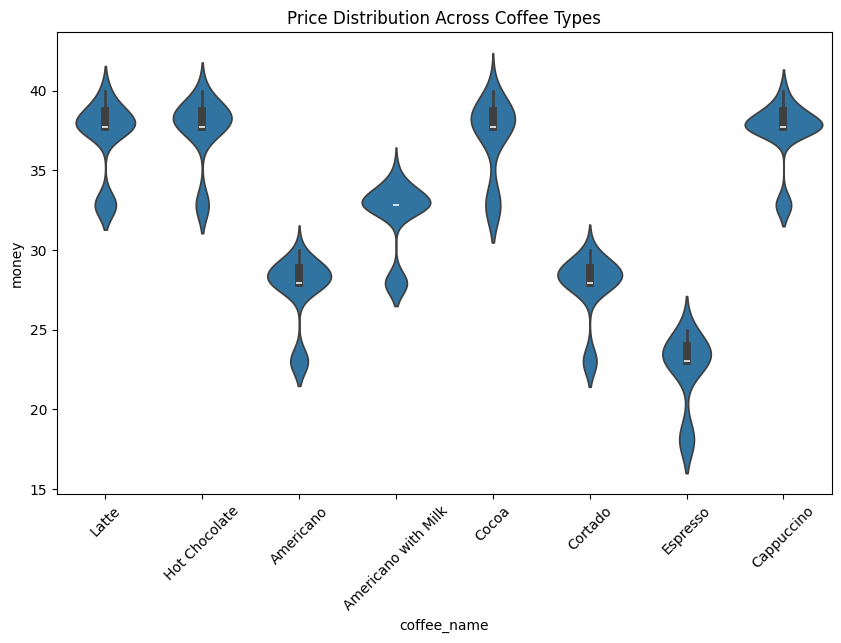

In [16]:
plt.figure(figsize=(10,6))
sns.violinplot(x='coffee_name', y='money', data=df)
plt.title("Price Distribution Across Coffee Types")
plt.xticks(rotation=45)
plt.show()

# Cappuccino, Cocoa, and Latte have consistent and slightly higher price ranges, while Espresso shows more spread.

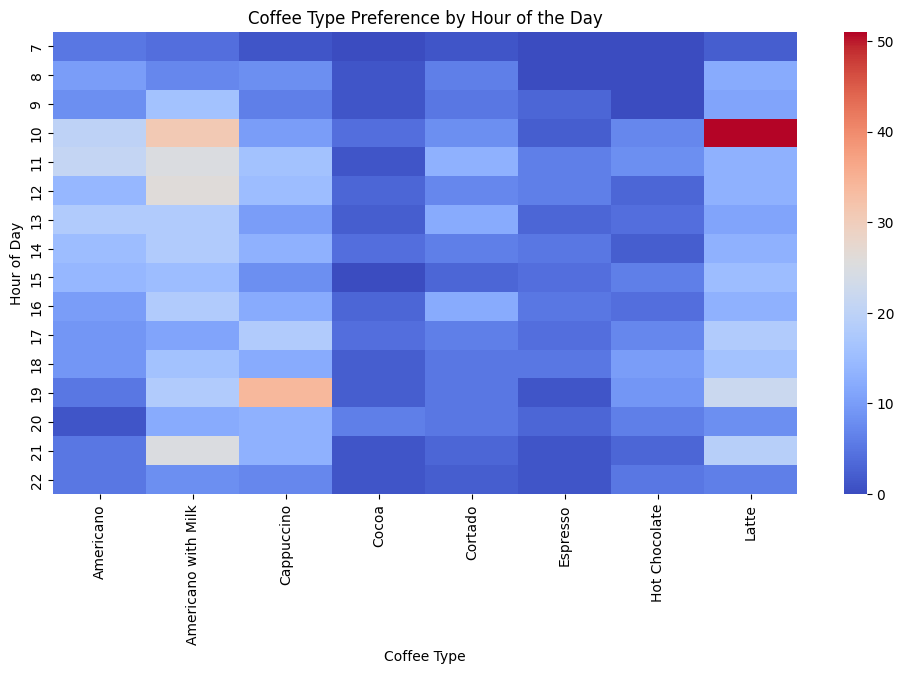

In [13]:
plt.figure(figsize=(12,6))
coffee_hour = pd.crosstab(df['hour'], df['coffee_name'])
sns.heatmap(coffee_hour, cmap="coolwarm")
plt.title("Coffee Type Preference by Hour of the Day")
plt.xlabel("Coffee Type")
plt.ylabel("Hour of Day")
plt.show()

## 3. Apply ML 


In [26]:
# importing neccsry libaries
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [27]:
le = LabelEncoder()
df['cash_type'] = le.fit_transform(df['cash_type'])
# (Optional) encode day_of_week and month too
df['day_of_week'] = LabelEncoder().fit_transform(df['day_of_week'])
df['month'] = LabelEncoder().fit_transform(df['month'])
df['coffee_name'] = LabelEncoder().fit_transform(df['coffee_name'])

In [28]:
# Move coffee_name to the last position
cols = [col for col in df.columns if col != 'coffee_name'] + ['coffee_name']
df = df[cols]

df.head()

,date,datetime,cash_type,card,money,hour,day_of_week,month,coffee_name
0,45352,2024-03-01 10:15:50.520,0,ANON-0000-0000-0001,38.7,10,0,3,7
1,45352,2024-03-01 12:19:22.539,0,ANON-0000-0000-0002,38.7,12,0,3,6
2,45352,2024-03-01 12:20:18.089,0,ANON-0000-0000-0002,38.7,12,0,3,6
3,45352,2024-03-01 13:46:33.006,0,ANON-0000-0000-0003,28.9,13,0,3,0
4,45352,2024-03-01 13:48:14.626,0,ANON-0000-0000-0004,38.7,13,0,3,7


In [29]:
# Features (everything except coffee_name, datetime, card, and date)
X = df.drop(columns=['coffee_name', 'datetime', 'card', 'date'])

# Target
y = df['coffee_name']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
    
}


In [31]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.5066
              precision    recall  f1-score   support

           0       0.45      0.52      0.48        27
           1       0.57      0.81      0.67        63
           2       0.41      0.43      0.42        35
           3       0.00      0.00      0.00         8
           4       0.33      0.11      0.16        19
           5       1.00      0.25      0.40         8
           6       0.00      0.00      0.00         9
           7       0.52      0.53      0.53        58

    accuracy                           0.51       227
   macro avg       0.41      0.33      0.33       227
weighted avg       0.47      0.51      0.47       227


Decision Tree Accuracy: 0.6432
              precision    recall  f1-score   support

           0       0.55      0.59      0.57        27
           1       0.97      0.97      0.97        63
           2       0.45      0.60      0.51        35
           3       0.00      0.00      0.00         8
        

In [32]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
print("\n=== Model Comparison ===")
print(results_df.sort_values(by="Accuracy", ascending=False))


=== Model Comparison ===
                 Model  Accuracy
3    Gradient Boosting  0.651982
2        Random Forest  0.647577
1        Decision Tree  0.643172
5                  KNN  0.585903
6                  SVM  0.568282
7          Naive Bayes  0.541850
4             AdaBoost  0.524229
0  Logistic Regression  0.506608


In [34]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    print(f"\n{name} Accuracy: {acc:.5f}")
    print(classification_report(y_test, y_pred))



Logistic Regression Accuracy: 0.50661
              precision    recall  f1-score   support

           0       0.45      0.52      0.48        27
           1       0.57      0.81      0.67        63
           2       0.41      0.43      0.42        35
           3       0.00      0.00      0.00         8
           4       0.33      0.11      0.16        19
           5       1.00      0.25      0.40         8
           6       0.00      0.00      0.00         9
           7       0.52      0.53      0.53        58

    accuracy                           0.51       227
   macro avg       0.41      0.33      0.33       227
weighted avg       0.47      0.51      0.47       227


Decision Tree Accuracy: 0.64317
              precision    recall  f1-score   support

           0       0.55      0.59      0.57        27
           1       0.97      0.97      0.97        63
           2       0.45      0.60      0.51        35
           3       0.00      0.00      0.00         8
      

# Conclusion
##  we have tried many different ML models we can conclude that RandomForest and Gradient boosting performed much better than other models.